In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,8)

import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
    
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [3]:
df = pd.read_csv('exog.csv')
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [4]:
df.shape

(517, 4)

#### Keeping a copy for future references

In [5]:
df1 = df.copy()

In [6]:
df.isna().sum()

date        0
weekday     0
holiday     0
total      39
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df.head(5)

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


#### Plotting Source Data

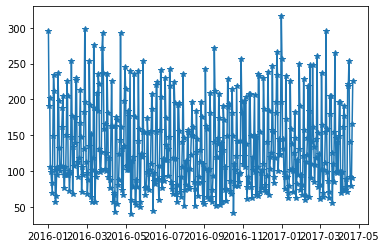

In [9]:
plt.plot(df.index, df['total'], '-*')
plt.show()

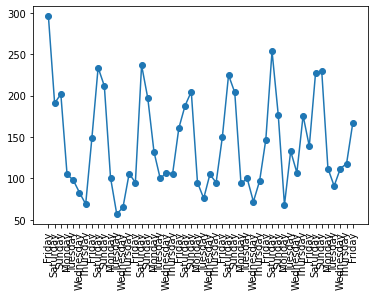

In [10]:
plt.plot(range(50),df['total'][:50], '-o')
plt.xticks(range(0,50), df['weekday'][:50],rotation = 90)
plt.show()

In [11]:
train = df.iloc[:436]
test = df.iloc[436:]

## Exogenous Variables

In [12]:
model = SARIMAX(train['total'],seasonal_order=(1,0,1,7))
results = model.fit()
fc = results.forecast(42)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33146D+00    |proj g|=  6.55179D-02

At iterate    5    f=  5.24127D+00    |proj g|=  5.50413D-02

At iterate   10    f=  5.18655D+00    |proj g|=  7.48231D-02

At iterate   15    f=  4.98736D+00    |proj g|=  4.10049D-02

At iterate   20    f=  4.95333D+00    |proj g|=  1.17956D-02

At iterate   25    f=  4.94460D+00    |proj g|=  4.31024D-03

At iterate   30    f=  4.94384D+00    |proj g|=  2.87780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [13]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

#### Observing the relation of predicted vs actual values on holidays

MAE : 25.159
RMSE : 31.97
MAPE: 0.202


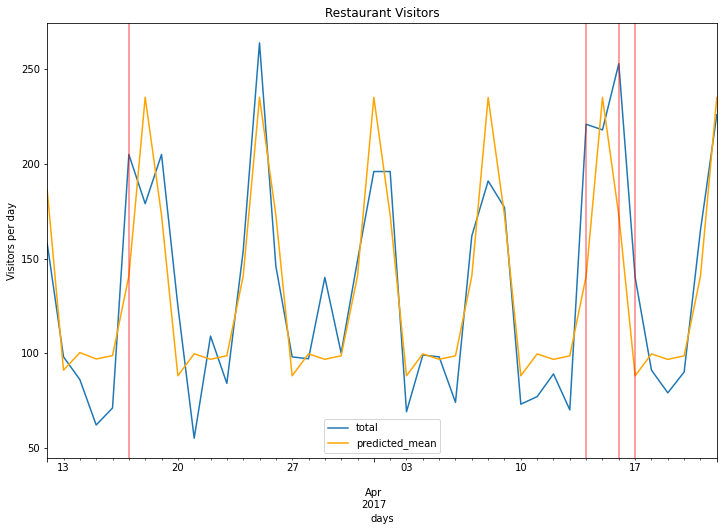

In [14]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5)

## SARIMAX 

In [15]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52875D+00    |proj g|=  1.72995D-01

At iterate    5    f=  5.43727D+00    |proj g|=  7.88960D-02


/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.40956D+00    |proj g|=  2.86539D-01

At iterate   15    f=  5.18546D+00    |proj g|=  6.28677D-02

At iterate   20    f=  5.17678D+00    |proj g|=  1.51118D-02

At iterate   25    f=  5.14577D+00    |proj g|=  2.45444D-01

At iterate   30    f=  4.79296D+00    |proj g|=  7.27489D-02

At iterate   35    f=  4.79176D+00    |proj g|=  2.21281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     52      1     0     0   1.806D-05   4.792D+00
  F =   4.7917623655814099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


### Forecasting with SARIMAX with exogenous variables

In [16]:
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 18.649
RMSE : 22.93
MAPE: 0.161


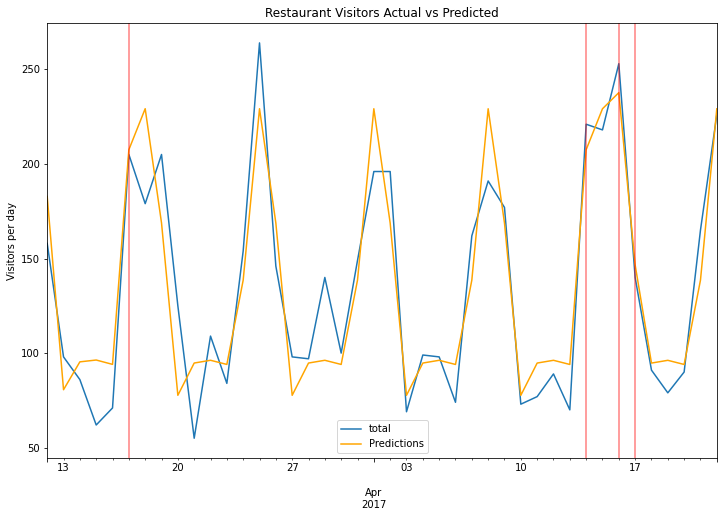

In [17]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

### Predicting NaN observations with SARIMAX

In [18]:
model = SARIMAX(df['total'],exog=df['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df1[478:][['holiday']]
fcast = results.predict(478,df1.shape[0]-1,exog = exog_forecast).rename('Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52444D+00    |proj g|=  1.70479D-01

At iterate    5    f=  5.47083D+00    |proj g|=  1.08907D+00

At iterate   10    f=  5.43772D+00    |proj g|=  2.82524D-02


/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  5.43656D+00    |proj g|=  4.86868D-02

At iterate   20    f=  5.40831D+00    |proj g|=  2.14016D-01

At iterate   25    f=  5.22026D+00    |proj g|=  2.62885D-01

At iterate   30    f=  5.17200D+00    |proj g|=  4.51710D-03

At iterate   35    f=  5.14776D+00    |proj g|=  2.24577D-01

At iterate   40    f=  4.81403D+00    |proj g|=  3.75145D-01

At iterate   45    f=  4.77744D+00    |proj g|=  3.86000D-03

At iterate   50    f=  4.77735D+00    |proj g|=  3.29051D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   3.291D-05   4.777D+00
  F =   4.77734671487

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Visualizing the last 100 observations of the dataset, for clear visualization.

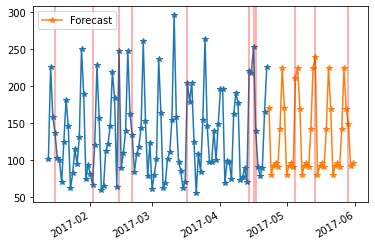

In [19]:
# Plot the forecast alongside historical values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'

# ax = df['total'][-100:].plot(legend=True,figsize=(16,5),title=title, style = '-*')
plt.plot(df[-100:].index, df[-100:].total, '-*')
fcast.plot(legend=True, style = '-*')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df[-100:].query('holiday==1').index: 
    plt.axvline(x=x, color='red', alpha = 0.4)

for x in df1[-42:].query('holiday==1').date: 
    plt.axvline(x=pd.to_datetime(x), color='red', alpha = 0.4)
